# ASAS-SN21q analysis using ASAS V lightcurve with Lightkurve BLS

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import lightkurve as lk
from io import StringIO
import io
import matplotlib.pyplot as plt
from astropy.stats import BoxLeastSquares
from astropy.io import ascii
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
asas_dat = ascii.read ('http://www.astrouw.edu.pl/cgi-asas/asas_cgi_get_data?081523-3859.4,asas3')
ascii.write(asas_dat,'values1.csv', format='csv', fast_writer=False) 

asas_data = pd.read_csv('values1.csv', 
                 keep_default_na=False, na_values=[""])

In [3]:
#removing bad filtered data class a,b,c,d, asas has HJD-2450000
filtered_asas_data =  asas_data[(asas_data['col12'] != 'C')
                                 & (asas_data['col12'] != 'D')]

In [5]:
#lets calculate centered mean from 5 apertures 

mean_asas = filtered_asas_data[['col2','col3','col4','col5','col6']]
filtered_asas_data['mag'] = mean_asas[['col2','col3','col4','col5','col6']].apply(lambda x: x.drop([x.idxmax(),x.idxmin()]).mean() , axis = 1)
filtered_asas_data['HJD'] = filtered_asas_data['col1'] 
print('here we have all we need')
filtered_asas_data

here we have all we need


,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,mag,HJD
21,2232.76739,13.059,13.251,13.380,13.490,13.622,0.052,0.042,0.034,0.037,0.039,A,40532,13.373667,2232.76739
44,4230.56759,13.615,13.593,13.586,13.567,13.525,0.038,0.034,0.031,0.033,0.036,A,223663,13.582000,4230.56759
64,1869.79281,13.475,13.529,13.592,13.572,13.481,0.058,0.031,0.030,0.038,0.050,A,311,13.527333,1869.79281
65,1871.74818,13.598,13.636,13.619,13.529,13.330,0.067,0.033,0.032,0.039,0.052,A,569,13.582000,1871.74818
66,1872.83704,13.442,13.428,13.357,13.315,13.244,0.043,0.027,0.027,0.034,0.046,A,768,13.366667,1872.83704
67,1874.73731,13.538,13.559,13.622,13.615,13.527,0.079,0.039,0.037,0.045,0.058,B,1049,13.570667,1874.73731
68,1875.84916,13.461,13.498,13.469,13.396,13.252,0.064,0.033,0.033,0.040,0.052,A,1258,13.442000,1875.84916
69,1877.72528,13.640,13.708,13.729,13.684,13.523,0.047,0.029,0.028,0.034,0.044,A,1524,13.677333,1877.72528
70,1878.81818,13.513,13.464,13.433,13.386,13.247,0.044,0.031,0.027,0.034,0.042,A,1723,13.427667,1878.81818
71,1881.76997,13.618,13.634,13.521,13.331,13.269,0.039,0.029,0.026,0.032,0.042,A,2172,13.490000,1881.76997


In [16]:
lc = lk.LightCurve(time= filtered_asas_data['HJD'], 
                   flux= filtered_asas_data['mag'])

In [8]:
def plot_bls(alltime, allflux, alltimebinned, allfluxbinned, model, results, period, duration, t0, mid_transit_t0, in_transit = [0], in_transit_notbinned = [0]):
    '''
    Plot the BLS. This functinon is called in data_bls().

    Parameters
    ----------
    alltime  :  list
        times (not binned)
    allflux  :  list
        normalized flux (not binned)
    alltimebinned  :  list
        binned time
    allfluxbinned  :  list
        normalized binned flux
    model :  float
        the transit model at the given period, duration, and phase
    results :  class
        results from the BLS fitting routine
    period :  float
        the period of the 'most-likely' transits
    duration :  float
        the duration of the transit
    t0  :  float
        the mid-transit time of the reference transit
    in_transit = [0] :  float
        if this is [0] (by deafult), the code knows that this is the initial run i.e. no transits have been removes (+ results are plotted in different colors)
    in_transit_notbinned = [0]. :  float
        if this is [0] (by deafult), the code knows that this is the initial run i.e. no transits have been removes (+ results are plotted in different colors)

    Returns
    -------
        Plot the results from the BLS with three pannels: periodgram, best fit model to the transits, phase folded fit.
    '''

    if len(in_transit) == 1:  
        
        color1 = '#DC143C'
        color2 = 'darkorange'
        title = 'Initial BLS'

    else:  
        
        color1 = 'deepskyblue'
        color2 = '#4682B4'
        title = 'Initial event removed'
        

    fig, axes = plt.subplots(3, 1, figsize=(5, 7))

    # highlight the harmonics of the peak period
    ax = axes[0]
    ax.axvline(period, alpha=0.4, lw=5, color = color1)
    for n in range(2, 15):
        ax.axvline(n*period, alpha=0.4, lw=2, linestyle="dashed", color = color2) # plot the harmonics
        ax.axvline(period / n, alpha=0.4, lw=2, linestyle="dashed", color = color2)

    # ------------
    # plot the periodogram
    ax.plot(results.period, results.power, "k", lw=0.5, label = 'P = %.3f T0 = %.3f' % (period,mid_transit_t0))
    ax.set_title(title)
    ax.set_xlim(results.period.min(), results.period.max())
    ax.set_xlabel("period (days)")
    ax.set_ylabel("log likelihood")
    ax.legend(fontsize = 10, loc = 1)

    # ------------
    # plot the light curve and best-fit model
    ax = axes[1]

    if len(in_transit) == 1:  # for the initial run
        ax.plot(alltime, allflux, marker =".", alpha = 0.4, color = color2, ms=2, lw = 0, MarkerFaceColor = 'none')
        ax.plot(alltimebinned, allfluxbinned, marker ="o", alpha = 0.6, color = 'black', ms=3, lw = 0, MarkerFaceColor = 'none')
    else:  # for the second run (once the first 'event' has been removed)
        ax.plot(alltime[~in_transit_notbinned], allflux[~in_transit_notbinned], marker =".", alpha = 0.4, color = color2, ms=2, lw = 0, MarkerFaceColor = 'none')
        ax.plot(alltimebinned[~in_transit], allfluxbinned[~in_transit], marker ="o", alpha = 0.6, color = 'black',  MarkerFaceColor = 'none', ms=3, lw = 0)

    x = np.linspace(alltimebinned.min(), alltimebinned.max(), 3*len(alltimebinned))
    f = model.model(x, period, duration, t0)
    ax.plot(x, f, lw=2, color = color1)
    ax.set_xlim(alltimebinned.min(), alltimebinned.max())
    ax.set_xlabel("time (days)")
    ax.set_ylabel("de-trended flux (ppt)");

    # ------------
    ax = axes[2]
    if len(in_transit) == 1:  # for the initial run
        x_binned = (alltimebinned - t0 + 0.5*period) % period - 0.5*period
        x = (alltime - t0 + 0.5*period) % period - 0.5*period
    else: # for the second run (once the first 'event' has been removed)
        x_binned = (alltimebinned[~in_transit] - t0 + 0.5*period) % period - 0.5*period
        x = (alltime[~in_transit_notbinned] - t0 + 0.5*period) % period - 0.5*period

    m_binned = np.abs(x_binned) < 0.5
    m = np.abs(x) < 0.5

    # plot the data
    if len(in_transit) == 1:  # for the initial run
        ax.plot(x[m], allflux[m],marker =".", alpha = 0.4, color = color2, ms=2, lw = 0, MarkerFaceColor = 'none')
        ax.plot(x_binned[m_binned], allfluxbinned[m_binned], marker ="o", alpha = 0.6, color = 'black', ms=3, lw = 0, MarkerFaceColor = 'none')

    else: # for the second run (once the first 'event' has been removed)
        ax.plot(x[m], allflux[~in_transit_notbinned][m],marker =".", alpha = 0.4, color = color2, ms=2, lw = 0, MarkerFaceColor = 'none')
        ax.plot(x_binned[m_binned], allfluxbinned[~in_transit][m_binned], marker ="o", alpha = 0.6, color = 'black', ms=3, lw = 0, MarkerFaceColor = 'none')

    x = np.linspace(-0.5, 0.5, 1000)
    f = model.model(x + t0, period, duration, t0)
    ax.plot(x, f, lw=2, color = color1)
    ax.set_xlim(-0.5, 0.5)
    ax.set_xlabel("time since transit (days)")
    ax.set_ylabel("de-trended flux (ppt)");
    plt.tight_layout()
    plt.savefig('asas_v_bls.png')
    plt.show()
    


In [9]:
# you don't have to change the code in this cell, but you do have to run it once for the rest of the notebook to work
def data_bls(lc):
    '''
    function that runs the BLS routine and plots the results. The BLS is run twice and in the second
    the most significant result found in the first run is removed.
    Prior to running the BLS the data is detrended.

    Parameters
    ----------
    lc: from lightkurve for one or more sectors 

    Returns
    -------
        two lists of the statistics of the to BLS runs. Each list contains:
    stats_period
    stats_t0
    stats_depth
    stats_depth_phased
    stats_depth_half
    stats_depth_odd
    stats_depth_even
    '''
    
    # normalize the data
    try:
        lc = lc.normalize()
    except:
        lc = lc.stitch()
        
    alltime = lc.time.value
    allflux = lc.flux.value
    
    lc_bin = lc.bin(15/60/24) # you can change the binning factor here if you like
    alltimebinned = lc_bin.time.value
    allfluxbinned = lc_bin.flux.value
        
    # make sure that there are no nan (empty) values in the data - they cause everything to crash so let's get rid of them
    mask_binned = np.isfinite(alltimebinned) * np.isfinite(allfluxbinned)
    mask = np.isfinite(alltime) * np.isfinite(allflux)

    alltimebinned = np.array(alltimebinned)[mask_binned]
    allfluxbinned = np.array(allfluxbinned)[mask_binned]
    alltime = np.array(alltime)[mask]
    allflux = np.array(allflux)[mask]

    # -------------------

    # detrend the data before running the BLS

    mask_binned = np.isfinite(alltimebinned) * np.isfinite(allfluxbinned)
    alltimebinned = np.array(alltimebinned)[mask_binned]
    allfluxbinned = np.array(allfluxbinned)[mask_binned]
    # -----------------------

    durations = np.linspace(0.05, 0.5, 15) # ????? CHECK THESE
    periods = np.arange(0.7, (np.nanmax(alltimebinned) - np.nanmin(alltimebinned)), 0.01)
    
    model = BoxLeastSquares(alltimebinned, allfluxbinned)
    results = model.power(periods, durations)

    index = np.argmax(results.power)
    period = results.period[index]
    t0 = results.transit_time[index]
    duration = results.duration[index]
    mid_transit_t0 = model.compute_stats(period, duration, t0)['transit_times'][0]

    # call the first round of plotting

    plot_bls(alltime, allflux, alltimebinned, allfluxbinned, model, results, period, duration, t0, mid_transit_t0)

    stats_period = period
    stats_t0 = mid_transit_t0
    stats_depth = model.compute_stats(period, duration, t0)['depth']
    stats_depth_phased = model.compute_stats(period, duration, t0)['depth_phased']
    stats_depth_half = model.compute_stats(period, duration, t0)['depth_half']
    stats_depth_odd = model.compute_stats(period, duration, t0)['depth_odd']
    stats_depth_even = model.compute_stats(period, duration, t0)['depth_even']

    if (1*duration) >= period: # if the 'found' events are very short period, don't rn the BLS twice as the code would crash.
        return [stats_period, stats_t0, stats_depth, stats_depth_phased, stats_depth_half, stats_depth_odd, stats_depth_even], [-999]

    # Find the in-transit points using a longer duration as a buffer to avoid ingress and egress
    in_transit = model.transit_mask(alltimebinned, period, 2*duration, t0)
    in_transit_notbinned = model.transit_mask(alltime, period, 2*duration, t0)
    
    # Re-run the algorithm, and plot the results
    model2 = BoxLeastSquares(alltimebinned[~in_transit], allfluxbinned[~in_transit])
    results2 = model2.power(periods, durations)

    # Extract the parameters of the best-fit model
    index = np.argmax(results2.power)
    period2 = results2.period[index]
    t02 = results2.transit_time[index]
    duration2 = results2.duration[index]
    mid_transit_t02 = model.compute_stats(period2, duration2, t02)['transit_times'][0]
    
    # call the second round of plotting - once the intitial transit has been removed
    plot_bls(alltime, allflux, alltimebinned, allfluxbinned, model2, results2,period2,duration2,t02, mid_transit_t02, in_transit = in_transit, in_transit_notbinned = in_transit_notbinned)
    
    stats2_period = period2
    stats2_t0 = mid_transit_t02
    stats2_depth = model2.compute_stats(period2, duration2, t0)['depth']
    stats2_depth_phased = model2.compute_stats(period2, duration2, t0)['depth_phased']
    stats2_depth_half = model2.compute_stats(period2, duration2, t0)['depth_half']
    stats2_depth_odd = model2.compute_stats(period2, duration2, t0)['depth_odd']
    stats2_depth_even = model2.compute_stats(period2, duration2, t0)['depth_even']
        
    df = pd.DataFrame({"Period (days)": [stats_period,stats2_period], "T0 (TBJD)":[stats_t0,stats2_t0], "Transit depth (ppm)":[stats_depth[0],stats2_depth[0]], "Odd depth (ppm)": [stats_depth_odd[0],stats2_depth_odd[0]], "Even depth (ppm)":[stats_depth_even[0],stats2_depth_even[0]]})
    return df



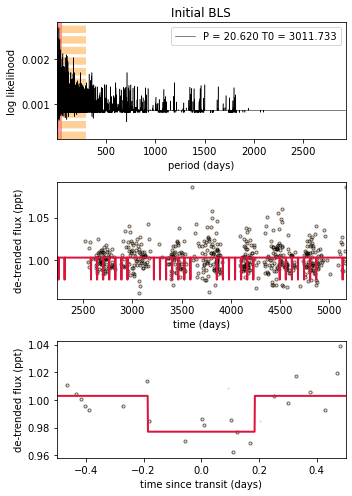

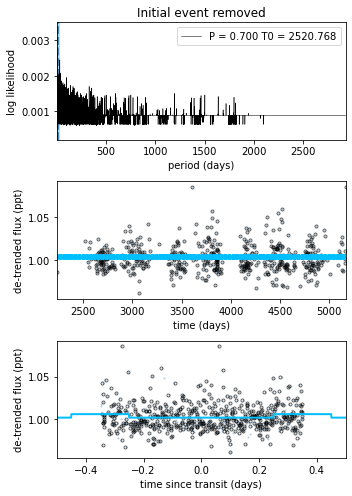

Suggestive periods below for ASAS V:


,Period (days),T0 (TBJD),Transit depth (ppm),Odd depth (ppm),Even depth (ppm)
0,20.62,3011.732598,0.025886,0.024165,0.027607
1,0.70,2520.767598,0.001050,0.001063,0.001037


In [10]:
df = data_bls(lc)
print('Suggestive periods below for ASAS V:')
df

In [11]:
period = 20.620
t0 = 3011.732598

<AxesSubplot:xlabel='Time [JD]', ylabel='Flux'>

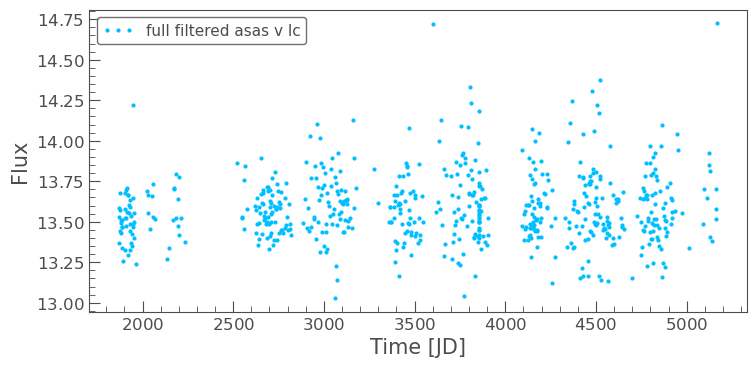

In [12]:
lc.plot(linewidth = 0, marker = 'o',color = 'deepskyblue', alpha = 1, label = 'full filtered asas v lc')

In [28]:
lc_phased = lc.fold(period =period, epoch_time = t0)

period = 20.62 t0 = 53011.732598


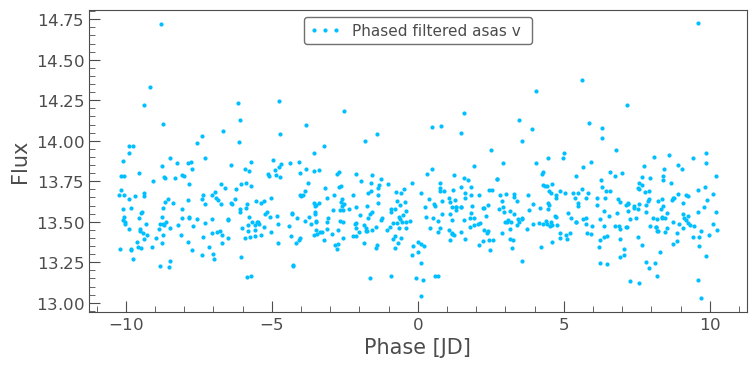

In [29]:
lc_phased.plot(linewidth = 0, marker = 'o',color = 'deepskyblue', alpha = 1, label = 'Phased filtered asas v ')
print('period = 20.62 t0 = 53011.732598')

In [30]:
lc_phased_norm = lc_phased.normalize()
lc_phased_norm = lc_phased_norm.remove_outliers(sigma_lower=float('inf'), sigma_upper=2)

phased / normalized


(0.95, 1.04)

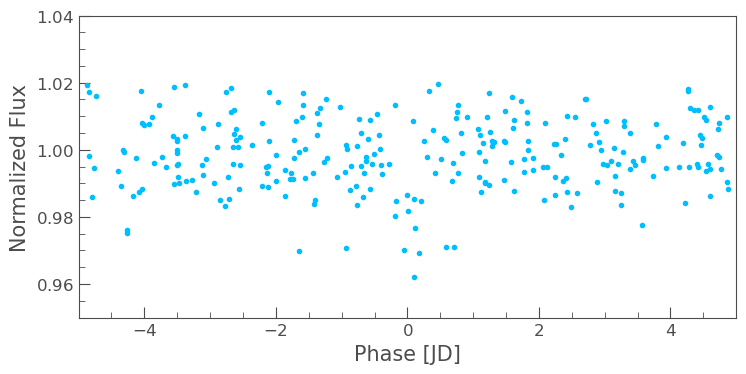

In [34]:
lc_phased_norm.plot(linewidth = 0, marker = 'o',color = 'deepskyblue', markersize = 3, alpha = 1)
print('phased / normalized')
plt.xlim(-5,5)
plt.ylim(0.95,1.04)

#This is best I can get tout of the old ASAS V data. I think it this solution looks plausible for transit, but far from confirmed.